# **Image Data Augmentation**


## Keras Update

In [1]:
!pip install --upgrade keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 7.5 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.1.1 which is incompatible.


In [2]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'

## 데이터가 부족한 세상으로 떠나기 위한 준비

In [6]:
import keras

from keras.preprocessing.image import load_img, img_to_array
# from keras.utils import load_img, img_to_array # 여기에도 있음! utils에는 우리가 많이 쓰는 함수들 넣어둔 것임

import numpy as np
import matplotlib.pyplot as plt

In [4]:
!wget -O Batman.webp https://github.com/DrKAI/image/raw/main/Batman01.webp
# !wget -O Batman.jpg https://ichef.bbci.co.uk/news/640/cpsprodpb/C120/production/_104304494_mediaitem104304493.jpg

--2024-04-02 06:10:25--  https://github.com/DrKAI/image/raw/main/Batman01.webp
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/DrKAI/image/main/Batman01.webp [following]
--2024-04-02 06:10:25--  https://raw.githubusercontent.com/DrKAI/image/main/Batman01.webp
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 281262 (275K) [image/webp]
Saving to: ‘Batman.webp’

Batman.webp         100%[===================>] 274.67K  --.-KB/s    in 0.05s   

2024-04-02 06:10:25 (5.82 MB/s) - ‘Batman.webp’ saved [281262/281262]



In [5]:
image_org = load_img("Batman.webp")
image = img_to_array(image_org)
image.shape  # height, width, channel

(1600, 1136, 3)

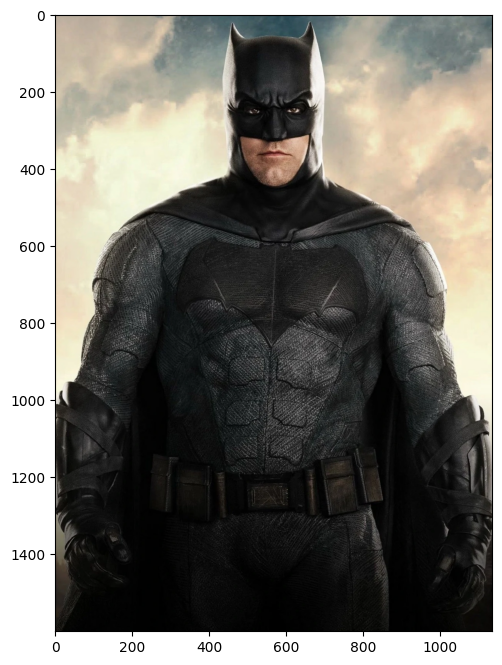

In [9]:
plt.figure(figsize=(12,8))
#plt.imshow(image)
plt.imshow(image/255)
plt.show()

In [10]:
image = np.expand_dims(image, axis=0) # 데이터 개수를 담당할 차원 추가

In [11]:
image.shape

(1, 1600, 1136, 3)

## **Image Augmentation Layers**
- [**케라스 공식 문서 참고**](https://keras.io/api/layers/preprocessing_layers/)

In [12]:
import keras

In [49]:
aug_layers = [keras.layers.RandomRotation(factor=(-0.3,0.3)),
              keras.layers.RandomTranslation(height_factor=(-0.3,0.3), width_factor=(-0.3,0.3)),
              keras.layers.RandomZoom(height_factor=(-0.2,0.2), width_factor=(-0.2,0.2)),
              keras.layers.RandomFlip(mode='horizontal_and_vertical') # 이미지를 수평 및 수직으로 뒤집음
              ] # 4개 전부 적용

In [50]:
def image_augmentation(images):
    for layer in aug_layers:
        images = layer(images)
    return images

In [51]:
aug_imgs = image_augmentation(image)

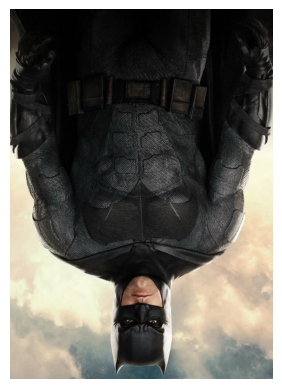

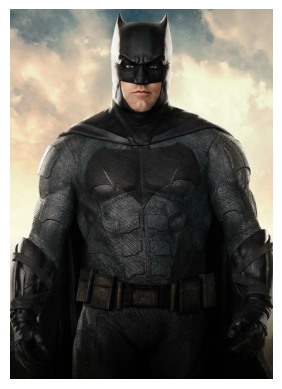

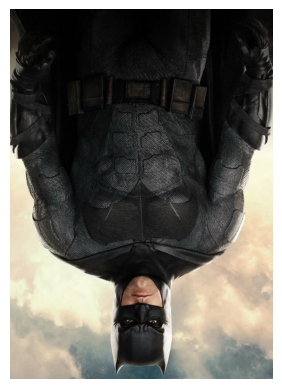

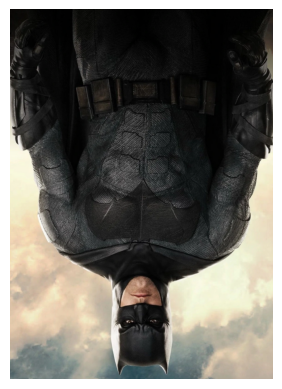

In [52]:
for i in range(4) :
    aug_imgs = image_augmentation(image)
    # temp = keras.preprocessing.image.array_to_img(aug_imgs)

    plt.imshow( aug_imgs[0]/255 )
    plt.axis('off')
    plt.show()